# Bitcoin Battle Royale - Getting started (Python 2 notebook)

Welcome to Bitcoin Battle Royale, a contest where you have the predict the probability of bitcoin moving more than 0.25% over the next 30min.

This notebook aims to provide a few code snippets you can use to download data from s3, and also a few ways to interact with the feature set.

You don't have to use any of this code, this should only be considered as a quick start guide...

If you have any questions, ask Eben or Mike :)

## How to download data from S3

This notebook references a config.ini file in the config folder. You should enter your AWS access key and secret key in the config.ini file. If you wanted to use ConfigParser to load your credentials, this is what it would look like:

In [1]:
import ConfigParser, os

Config = ConfigParser.ConfigParser(allow_no_value=True)
Config.read(os.path.join(os.path.dirname(os.getcwd()), 'config', 'config.ini'))

aws_access_key_id = Config.get("aws_credentials", "aws_access_key_id")
aws_secret_access_key = Config.get("aws_credentials", "aws_secret_access_key")
bucket_name_value = Config.get("aws_credentials", "bucket_name_value")

To download data, we're going to create a download folder on our local machine...

In [2]:
download_folder = os.path.join(os.path.dirname(os.getcwd()), 'data_downloads')
if not os.path.exists(download_folder):
    os.makedirs(download_folder)
    print("Created download folder", download_folder)
else:
    print("Download folder already exists", download_folder)

('Download folder already exists', '/Users/ebenesterhuizen/PycharmProjects/bitcoin_battle_royale/data_downloads')


Great! Now we're ready to download data from s3.
The following function makes it easy to list all the bitcoin files available for download in our s3 bucket...

In [3]:
import boto
from boto.s3.key import Key
from boto.s3.connection import OrdinaryCallingFormat

def download_most_recent_tick_data_files(download_destination=download_folder,
                                         number_of_files_to_download=5):
    
    # establish a connection using our access keys...
    conn = boto.connect_s3(aws_access_key_id,
                           aws_secret_access_key,
                           calling_format=OrdinaryCallingFormat())
    # connect to our bucket...
    bucket = conn.get_bucket(bucket_name_value)

    # connect to the folder that contains all the bitcoin trading data...
    most_recent_files = sorted([k.key for k in boto.s3.bucketlistresultset.bucket_lister(bucket,
                                                                                         prefix="featuredata/GDAX/")],
                               reverse=True)[0:int(number_of_files_to_download)]
    for most_recent_file_key in most_recent_files:
        k = Key(bucket, most_recent_file_key)
        k.get_contents_to_filename(os.path.join(download_destination,
                                                most_recent_file_key.split("/")[-1]))
        print("Downloaded to local...", most_recent_file_key)

# call the function...
download_most_recent_tick_data_files()

('Downloaded to local...', u'featuredata/GDAX/2018-04-25-GDAX.finalfeatures.csv')
('Downloaded to local...', u'featuredata/GDAX/2018-04-24-GDAX.finalfeatures.csv')
('Downloaded to local...', u'featuredata/GDAX/2018-04-23-GDAX.finalfeatures.csv')
('Downloaded to local...', u'featuredata/GDAX/2018-04-22-GDAX.finalfeatures.csv')
('Downloaded to local...', u'featuredata/GDAX/2018-04-21-GDAX.finalfeatures.csv')


Alternatively, d]

## Quick description of features...

In [4]:
import pandas as pd

# pick the most recent file for analysis...
most_recent_tick_data_file = os.path.join(download_folder,
                                          sorted(os.listdir(download_folder), reverse=True)[0])
data_df = pd.read_csv(most_recent_tick_data_file)
print(most_recent_tick_data_file, "df loaded, shape", data_df.shape)

('/Users/ebenesterhuizen/PycharmProjects/bitcoin_battle_royale/data_downloads/2018-04-25-GDAX.finalfeatures.csv', 'df loaded, shape', (52838, 117))


In [5]:
# we could just dump all the feature names in alphabetical order...
for feature in sorted(data_df.columns.values):
    print(feature)

0th_larg_order
0th_larg_order_10m_rar
0th_larg_order_1m_rar
0th_larg_order_60m_rar
1th_larg_order
1th_larg_order_10m_rar
1th_larg_order_1m_rar
1th_larg_order_60m_rar
2th_larg_order
2th_larg_order_10m_rar
2th_larg_order_1m_rar
2th_larg_order_60m_rar
3th_larg_order
3th_larg_order_10m_rar
3th_larg_order_1m_rar
3th_larg_order_60m_rar
4th_larg_order
4th_larg_order_10m_rar
4th_larg_order_1m_rar
4th_larg_order_60m_rar
5th_larg_order
5th_larg_order_10m_rar
5th_larg_order_1m_rar
5th_larg_order_60m_rar
6th_larg_order
6th_larg_order_10m_rar
6th_larg_order_1m_rar
6th_larg_order_60m_rar
7th_larg_order
7th_larg_order_10m_rar
7th_larg_order_1m_rar
7th_larg_order_60m_rar
8th_larg_order
8th_larg_order_10m_rar
8th_larg_order_1m_rar
8th_larg_order_60m_rar
9th_larg_order
9th_larg_order_10m_rar
9th_larg_order_1m_rar
9th_larg_order_60m_rar
last_size
last_size_10m_rar
last_size_1m_rar
last_size_60m_rar
max_price
max_price_10m_rar
max_price_1m_rar
max_price_60m_rar
max_volume
max_volume_10m_rar
max_volume_1m_

Key points:

1. Whenever you see a _rar value, remember that it refers to rolling average return by time, e.g. 10m = 10 minutes, 1m = 1 minute, 60m = an hour...
2. "larg_order" features refer to the orderbook on GDAX, largest orders, already normalized
3. "last_size" refers to the size of the most recent trade in BTC
4. "max_price", "min_price", "std_price", "max_volume", "mean_price" etc. all refers to statistical properties of recent price and volume trends
5. "side" is a variable that shows if the recent trade was a buy order or a sell order...
6. "time" is the UTC timestamp of the trade
7. "volume_over_price" and "volume_under_price" - ?
8. "vwp" refers to volume weighted price

## Display plots for feature interaction

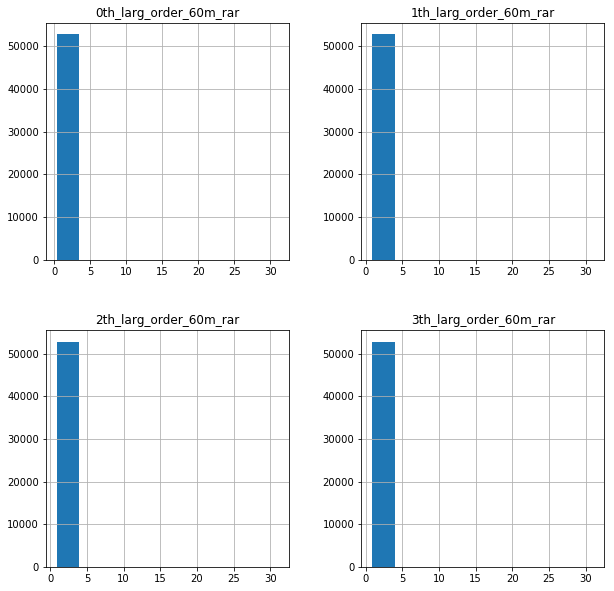

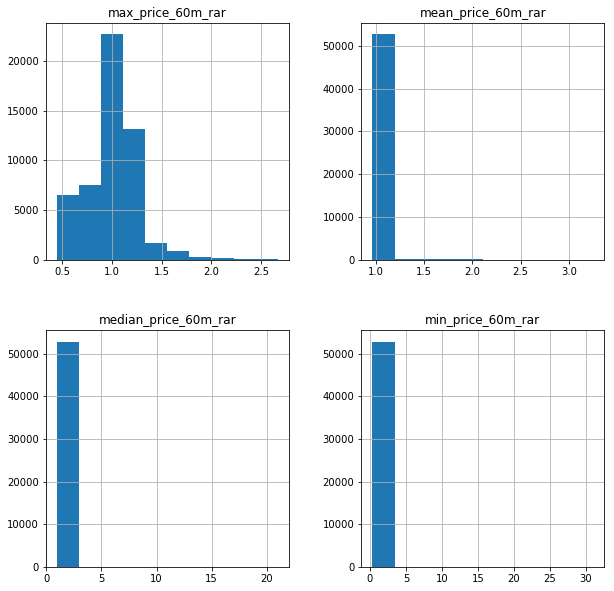

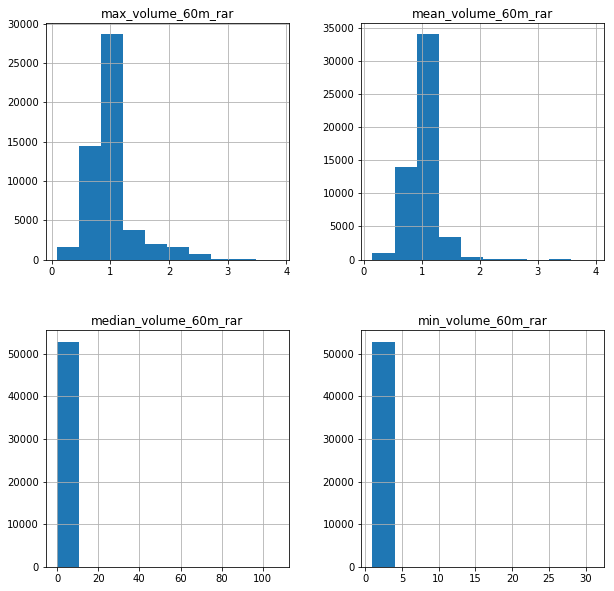

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

feature_categories_to_plot = ["_larg_order_60m_rar", "_price_60m_rar", "_volume_60m_rar"]

for feature_category in feature_categories_to_plot:
    features_to_scan = sorted([h for h in data_df.columns.values if h.find(feature_category) != -1])[0:4]
    data_df[features_to_scan].hist()

...notice how very few of these features look like they have a "normal" distribution...this is likely due to the impact of outliers...

One quick and easy way to filter for outliers is to simply remove the bottom x% and the top x% of a feature set...

('0th_larg_order_60m_rar', 'lower_bound', 0.8464112216659888, 'upper_bound', 1.2222474142451611)
('1th_larg_order_60m_rar', 'lower_bound', 0.9724630405624116, 'upper_bound', 1.0140785776213643)
('2th_larg_order_60m_rar', 'lower_bound', 0.972451547805629, 'upper_bound', 1.0144139346021244)
('3th_larg_order_60m_rar', 'lower_bound', 0.9709522932603001, 'upper_bound', 1.0145178636144792)
('max_price_60m_rar', 'lower_bound', 0.6457332684849622, 'upper_bound', 1.2729247660612055)
('mean_price_60m_rar', 'lower_bound', 0.9888797482917235, 'upper_bound', 1.0164791485928943)
('median_price_60m_rar', 'lower_bound', 0.9947193532546237, 'upper_bound', 1.0114533171658078)
('min_price_60m_rar', 'lower_bound', 0.6728305279224674, 'upper_bound', 1.3111635729148776)
('max_volume_60m_rar', 'lower_bound', 0.5517125882997262, 'upper_bound', 1.464502884411186)
('mean_volume_60m_rar', 'lower_bound', 0.7640490035822798, 'upper_bound', 1.2353688013970583)
('median_volume_60m_rar', 'lower_bound', 0.099463126099

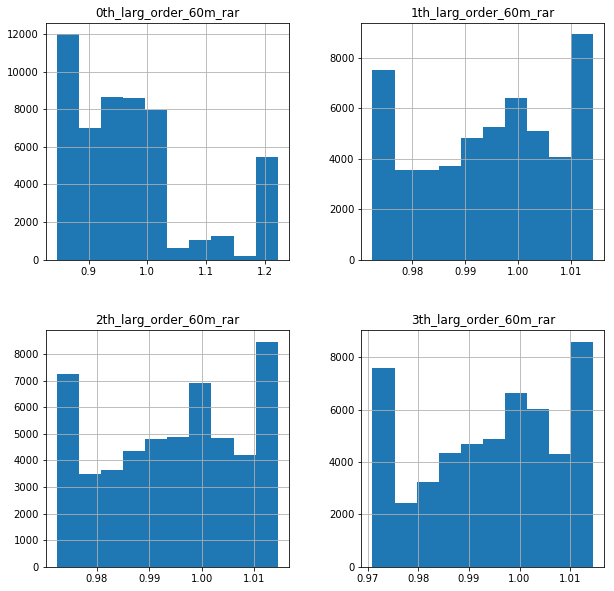

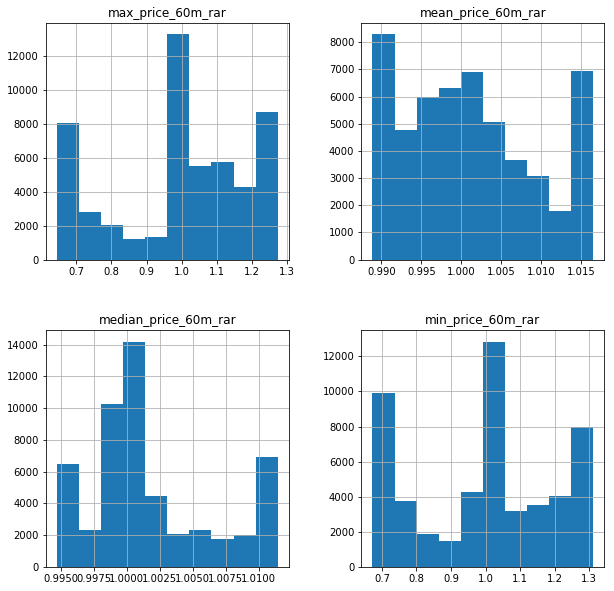

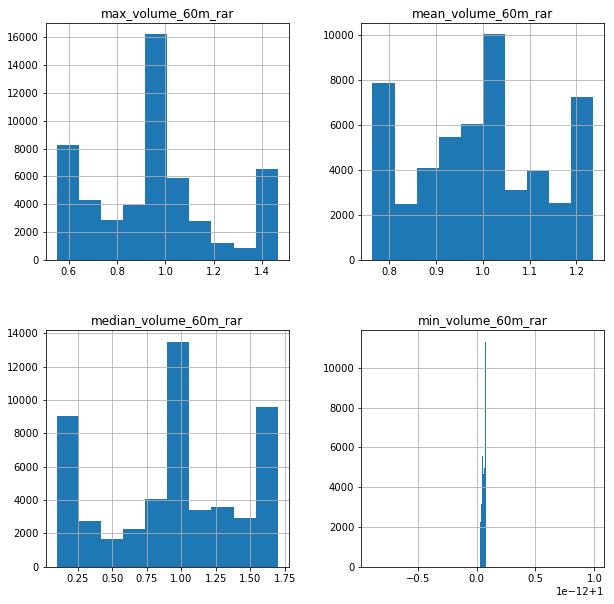

In [7]:
import numpy as np
import warnings

warnings.filterwarnings('ignore')

feature_categories_to_plot = ["_larg_order_60m_rar", "_price_60m_rar", "_volume_60m_rar"]

for feature_category in feature_categories_to_plot:
    features_to_scan = sorted([h for h in data_df.columns.values if h.find(feature_category) != -1])[0:4]
    outliers_removed_df = data_df[features_to_scan].copy()
    outliers_removed_df.dropna(inplace=True)
    for feature_to_scan in features_to_scan:
        lower_bound = np.percentile(outliers_removed_df[feature_to_scan], 10)
        upper_bound = np.percentile(outliers_removed_df[feature_to_scan], 90)
        print(feature_to_scan, "lower_bound", lower_bound, "upper_bound", upper_bound)
        outliers_removed_df[feature_to_scan] = outliers_removed_df[feature_to_scan].map(lambda x: lower_bound if x < lower_bound
                                                                                        else upper_bound if x > upper_bound
                                                                                        else x)
    outliers_removed_df[features_to_scan].hist()

In [8]:
# some of the feature sets have very high correlations with other feature sets...
# this is a function that takes a feature set as a string tag and generates correlation matrices

import seaborn as sns

def generate_correlation_plot(feature_category_to_plot):
    correlation_df = data_df.copy()
    headers_to_plot = sorted([h for h in correlation_df.columns.values if h.find(feature_category_to_plot) != -1])
    correlation_df = correlation_df[headers_to_plot]
    correlation_df.dropna(inplace=True)
    corr = correlation_df.corr()
    sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

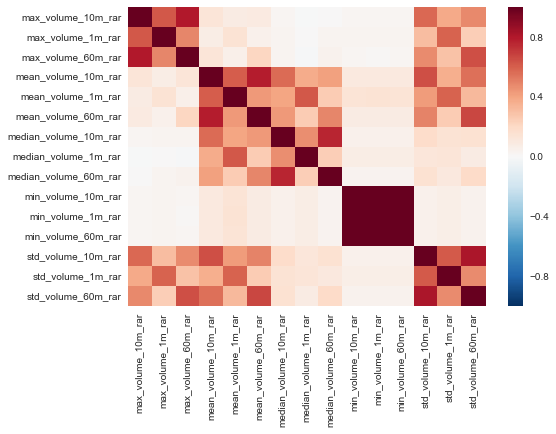

In [9]:
generate_correlation_plot("_volume_")

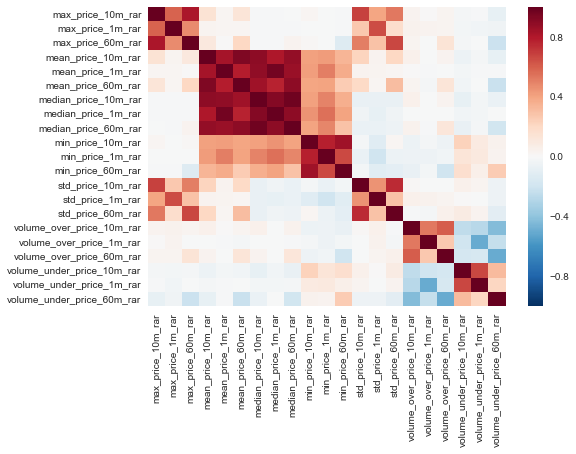

In [10]:
generate_correlation_plot("_price_")

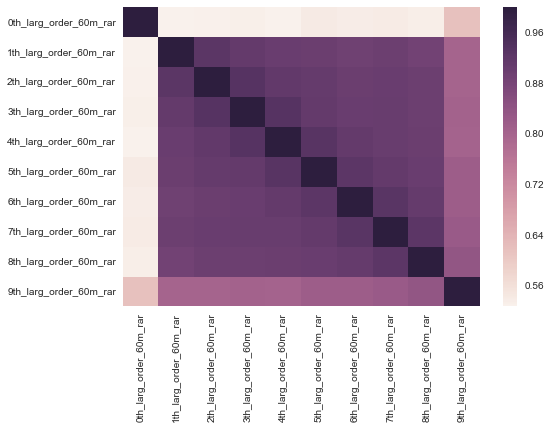

In [11]:
generate_correlation_plot("_larg_order_60m_")